# 2020-2021 Premier League Top 4 Chase

> Graphing the top 6 clubs in the 2020-2021 Premier League season and their historically close battle to finish in the top 4.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import requests
from matplotlib import pyplot as plt
import seaborn as sns
import json

In [2]:
# First, we make a call to the Premier League Table API to create a DataFrame showing the final 2020-2021 Premier League Standings

url = "https://heisenbug-premier-league-live-scores-v1.p.rapidapi.com/api/premierleague/table"

headers = {
    'x-rapidapi-key': "6227e8eb34msh0f296c91a858622p1186eajsn57939595dbb1",
    'x-rapidapi-host': "heisenbug-premier-league-live-scores-v1.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers)

data = response.json()

final_standings = pd.json_normalize(data, 'records')

In [3]:
# Creating a list of our top 6 teams called "teams"
teams = final_standings.team[0:6].tolist()

# final_standings DataFrame
final_standings

,team,played,win,draw,loss,goalsFor,goalsAgainst,points
0,Manchester City,38,27,5,6,83,32,86
1,Manchester United,38,21,11,6,73,44,74
2,Liverpool,38,20,9,9,68,42,69
3,Chelsea,38,19,10,9,58,36,67
4,Leicester,38,20,6,12,68,50,66
5,West Ham,38,19,8,11,62,47,65
6,Tottenham,38,18,8,12,68,45,62
7,Arsenal,38,18,7,13,55,39,61
8,Leeds,38,18,5,15,62,54,59
9,Everton,38,17,8,13,47,48,59


In [4]:
# Here our function returns a DataFrame showing the results of a designated Premier League matchweek
# An example for "Matchweek 1" is shown below
# We call this function 38 times - once for each matchweek

def get_DF(matchday):
    
    url = "https://heisenbug-premier-league-live-scores-v1.p.rapidapi.com/api/premierleague"

    querystring = {"matchday": matchday}

    headers = {
        'x-rapidapi-key': "6227e8eb34msh0f296c91a858622p1186eajsn57939595dbb1",
        'x-rapidapi-host': "heisenbug-premier-league-live-scores-v1.p.rapidapi.com"
        }

    response2 = requests.request("GET", url, headers=headers, params=querystring)
    
    data2 = response2.json()
    
    df2 = pd.json_normalize(data2, 'matches')
    
    return df2

In [5]:
"""

Example DataFrame showing the results of Matchweek 1.

There are 38 mmatchweeks in a Premier League season.

"""

get_DF(1)

,when,referee,time,venue,attendance,team1.teamName,team1.teamScore,team1.firstHalfScore,team2.teamName,team2.teamScore,team2.firstHalfScore
0,"Saturday, Sep 12 2020 12:30",Chris Kavanagh,FT,Craven Cottage,Behind Closed Doors,Fulham,0,0,Arsenal,3,1
1,"Saturday, Sep 12 2020 15:00",Jonathan Moss,FT,Selhurst Park,Behind Closed Doors,Crystal Palace,1,1,Southampton,0,0
2,"Tuesday, Jan 12 2021 20:15",Kevin Friend,FT,NaN,NaN,Burnley,0,0,Manchester United,1,0
3,"Wednesday, Jan 20 2021 18:00",Jonathan Moss,FT,NaN,NaN,Manchester City,2,0,Aston Villa,0,0
4,"Saturday, Sep 12 2020 17:30",Michael Oliver,FT,Anfield,Behind Closed Doors,Liverpool,4,3,Leeds,3,2
5,"Saturday, Sep 12 2020 20:00",Stuart Attwell,FT,London Stadium,Behind Closed Doors,West Ham,0,0,Newcastle United,2,0
6,"Sunday, Sep 13 2020 14:00",NaN,FT,NaN,NaN,West Bromwich Albion,0,0,Leicester,3,0
7,"Sunday, Sep 13 2020 16:30",Martin Atkinson,FT,Tottenham Hotspur Stadium,Behind Closed Doors,Tottenham,0,0,Everton,1,0
8,"Monday, Sep 14 2020 18:00",Mike Dean,FT,Bramall Lane,Behind Closed Doors,Sheffield United,0,0,Wolverhampton Wanderers,2,2
9,"Monday, Sep 14 2020 20:15",Craig Pawson,FT,AMEX Stadium,Behind Closed Doors,Brighton,1,0,Chelsea,3,1


In [6]:
top6 = {}
matchday = 1

while matchday <= 38:
    df2 = get_DF(matchday)  # Function call
    if matchday == 1:  # For matchweek 1
        
        for i in teams:
            if i in df2['team1.teamName'].tolist(): # If our team is the "Home" team
                
                squad = df2.loc[df2.index[df2['team1.teamName'] == i]]['team1.teamName'].tolist() # Team name
                ind = df2.index[df2['team1.teamName'] == squad[0]].tolist() # Index value in DataFrame
                home_score = df2.loc[int(ind[0])]['team1.teamScore'] # Home team score
                away_score = df2.loc[int(ind[0])]['team2.teamScore'] # Away team score
                
                if home_score > away_score:
                    top6[i] = [3] # 3 points for winning the game
                elif home_score == away_score:
                    top6[i] = [1] # 1 point for a draw
                else:
                    top6[i] = [0] # 0 points for a loss
                    
            elif i in df2['team2.teamName'].tolist(): # If our team is the "Away" team
                
                squad = df2.loc[df2.index[df2['team2.teamName'] == i]]['team2.teamName'].tolist()
                ind = df2.index[df2['team2.teamName'] == squad[0]].tolist()
                away_score = df2.loc[int(ind[0])]['team2.teamScore']
                home_score = df2.loc[int(ind[0])]['team1.teamScore']
                
                if home_score < away_score:
                    top6[i] = [3]
                elif home_score == away_score:
                    top6[i] = [1]
                else:
                    top6[i] = [0] 
                    
        matchday += 1
        
    elif matchday > 1:  # For matchweeks 2-38
        df2 = get_DF(matchday)  # Function call
        
        for i in teams:
            if i in df2['team1.teamName'].tolist(): # If our team is the "Home team"
                
                squad = df2.loc[df2.index[df2['team1.teamName'] == i]]['team1.teamName'].tolist() # Team name
                ind = df2.index[df2['team1.teamName'] == squad[0]].tolist()
                home_score = df2.loc[int(ind[0])]['team1.teamScore']
                away_score = df2.loc[int(ind[0])]['team2.teamScore']
                
                if home_score > away_score:
                    top6[i].append(3) # Appending points to existing dictionary entry
                elif home_score == away_score:
                    top6[i].append(1) # Appending points to existing dictionary entry
                else:
                    top6[i].append(0) # Appending points to existing dictionary entry
                    
            elif i in df2['team2.teamName'].tolist(): # If our team is the "Away" team
                
                squad = df2.loc[df2.index[df2['team2.teamName'] == i]]['team2.teamName'].tolist()
                ind = df2.index[df2['team2.teamName'] == squad[0]].tolist()
                away_score = df2.loc[int(ind[0])]['team2.teamScore']
                home_score = df2.loc[int(ind[0])]['team1.teamScore'] 
                
                if home_score < away_score:
                    top6[i].append(3) 
                elif home_score == away_score:
                    top6[i].append(1)
                else:
                    top6[i].append(0)
                    
        matchday += 1

In [13]:
# Creating our new DataFrame "final_df" from our top6 dictionary

final_df = pd.DataFrame(top6)

In [14]:
final_list = []
    
for l in teams:

    chase = final_df[l]
    chase.index = np.arange(1, len(chase) + 1) # Starting index of Series at 1 rather than 0

    # Adding up a teams points week by week so that each week after week 1 == sum of all the weeks proceeding it.
    for i in range(1, len(chase)+ 1):
            if i == 1:
                chase[i] = chase[i]
            else:
                chase[i] = chase[i] + chase[i - 1]

    final_list.append(chase.tolist()) # Append each list to a list "final_list" of lists

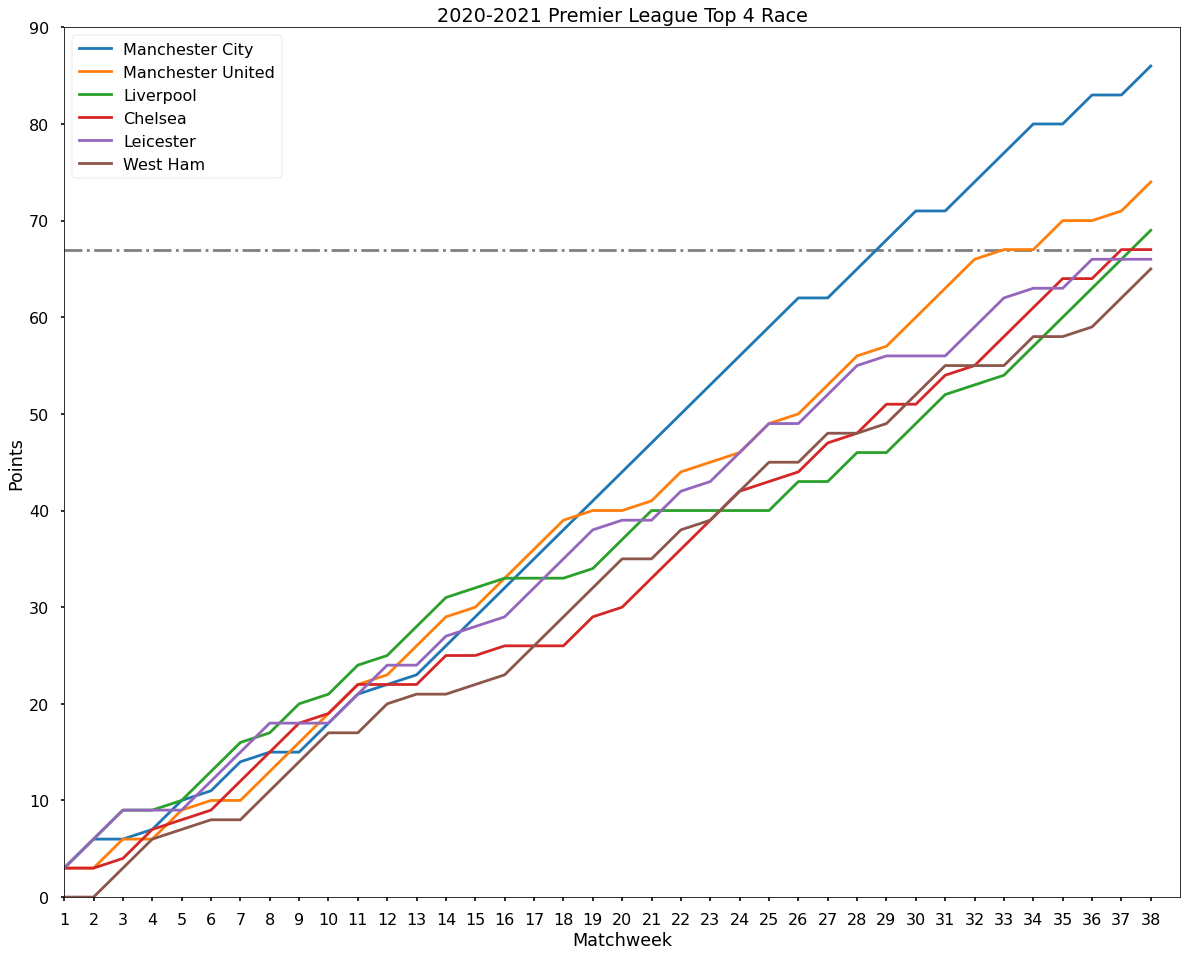

In [15]:
# Styling graph
plt.style.use('seaborn-poster')
plt.figure(figsize=(20, 16))
plt.plot(final_list[0], label = "Manchester City")
plt.plot(final_list[1], label = "Manchester United")
plt.plot(final_list[2], label = "Liverpool")
plt.plot(final_list[3], label = "Chelsea")
plt.plot(final_list[4], label = "Leicester")
plt.plot(final_list[5], label = "West Ham")
plt.hlines(y = final_list[3][-1], xmin = 0, xmax = 35.8, color = 'gray', linestyle = 'dashdot')
plt.legend(loc = "upper left")
plt.xticks(np.arange(len(final_list[0])), np.arange(1, len(final_list[0])+1)) # Making graph start at 1 rather than 0
plt.xlabel("Matchweek")
plt.ylabel("Points")
plt.title("2020-2021 Premier League Top 4 Race")
plt.xlim(0, 38)
plt.ylim(0, 90)
plt.show()

---
## Thanks for reading!
*Michael Black*